In [3]:
import sys; sys.path.append("../.."); sys.path.append("../../src/")
import plantbox as pb
import pickle

import matplotlib.pyplot as plt
import numpy as np
import os
from structural.Plant import PlantPython
import pandas as pd
import copy

subtypes = 5
years = 50

In [4]:

###
# Create the graphs
# to do: test the survival graphs + update code. as long as attached to existng long lived is ok
# as long as a living root is attched, will keep on living.
##
outpout_mean = {}
outpout_sd = {}
for genotype in ["B", "D", "E"]:

    with open('./measurements'+ genotype +'Init.pkl','rb') as f:
        temp = pickle.load(f)
        outpout_mean[genotype] = temp['mean']
        outpout_sd[genotype] = temp['sd']
x = [year+1 for year in range(years)]        


In [5]:
with open('./measurements'+ genotype +'.pkl','rb') as f:
        temp = pickle.load(f)['mu_data']

In [13]:
len(temp)

458

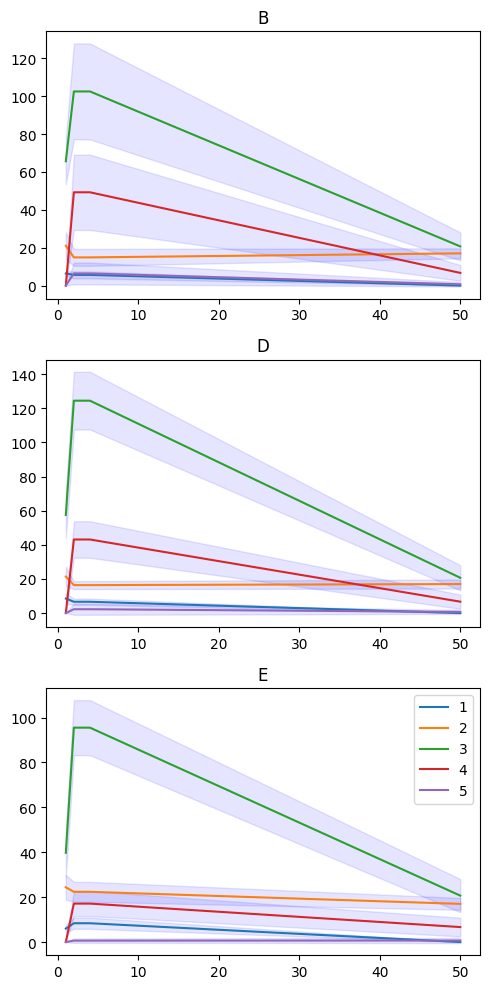

In [3]:
#####
#   num
#####
# create dict for each genotype, 2D arrays: [[length for each year] each subtype]
outpout_num_mean = {}
outpout_num_sd = {}

for genotype in ["B", "D", "E"]:
    outpout_num_mean[genotype] = np.array([
            np.array([outpout_mean[genotype]['year'+str(year + 1)]['num'][st] for year in range(years)])
            for st in range(subtypes)])
    outpout_num_sd[genotype] = np.array([
            np.array([outpout_sd[genotype]['year'+str(year + 1)]['num'][st] for year in range(years)])
            for st in range(subtypes)])
    

fig, axs = plt.subplots(3,1, figsize=(5, 10))  # 2 rows, 2 columns
for gid, genotype in enumerate(["B", "D", "E"]):
    for st in range(subtypes):
        y = outpout_num_mean[genotype][st]
        error = outpout_num_sd[genotype][st]
        axs[gid].plot(x, y, label = st + 1)
        axs[gid].fill_between(x, y - error, y + error, color='blue', alpha=0.1)
    axs[gid].set_title(genotype)

plt.legend()
# Adjust spacing between subplots
plt.tight_layout()

In [84]:
#for genotype in ["B", "D", "E"]:
#    print(genotype)
#    print(outpout_num_mean[genotype])

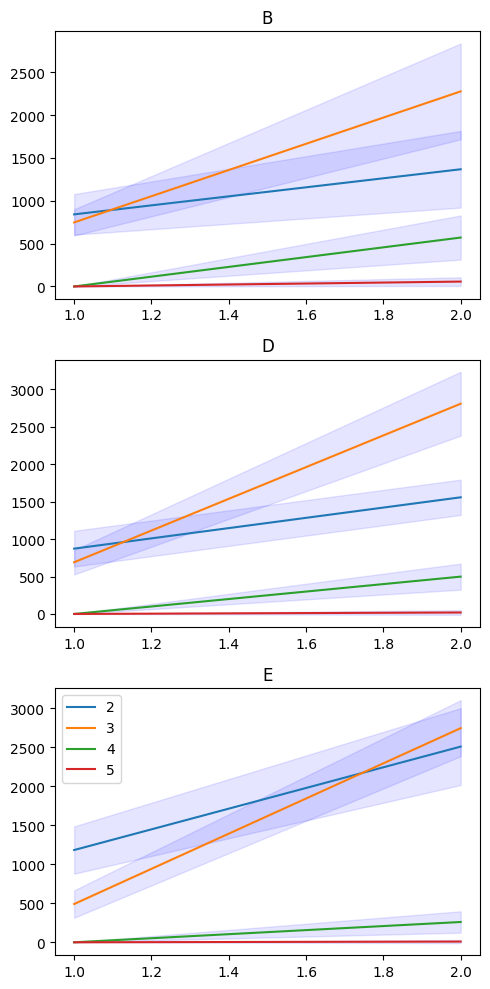

In [7]:
#####
#   length
#####
# create dict for each genotype, 2D arrays: [[length for each year] each subtype]
outpout_len_mean = {}
outpout_len_sd = {}
x_ =[1,2]
for genotype in ["B", "D", "E"]:
    outpout_len_mean[genotype] = np.array([
            np.array([outpout_mean[genotype]['year'+str(year + 1)]['length'][st] for year in range(2)])
            for st in range(subtypes - 1)])
    outpout_len_sd[genotype] = np.array([
            np.array([outpout_sd[genotype]['year'+str(year + 1)]['length'][st] for year in range(2)])
            for st in range(subtypes - 1)])
    
fig, axs = plt.subplots(3,1, figsize=(5, 10))  # 2 rows, 2 columns
for gid, genotype in enumerate(["B", "D", "E"]):
    for st in range(subtypes - 1):
        y = outpout_len_mean[genotype][st]
        error = outpout_len_sd[genotype][st]
        axs[gid].plot(x_, y, label = st + 2)
        axs[gid].fill_between(x_, y - error, y + error, color='blue', alpha=0.1)
    axs[gid].set_title(genotype)

plt.legend()
# Adjust spacing between subplots
plt.tight_layout()

In [5]:
outpout_len_mean

{'B': array([[  74.5825478 ,   61.91827757],
        [ 841.72814735, 1368.36188398],
        [ 747.9281324 , 2277.59976755],
        [   0.        ,  570.99229864]]),
 'D': array([[ 100.71996092,   74.18473896],
        [ 873.01883319, 1558.77296448],
        [ 691.13364476, 2809.52095227],
        [   0.        ,  498.75125678]]),
 'E': array([[  64.88364037,   98.96290463],
        [1181.86938402, 2506.75060629],
        [ 490.4061624 , 2742.87254991],
        [   0.        ,  259.98734948]])}

In [16]:
with open('./SurvivalRate.pkl','rb') as f:
    rtl_winters = pickle.load(f)

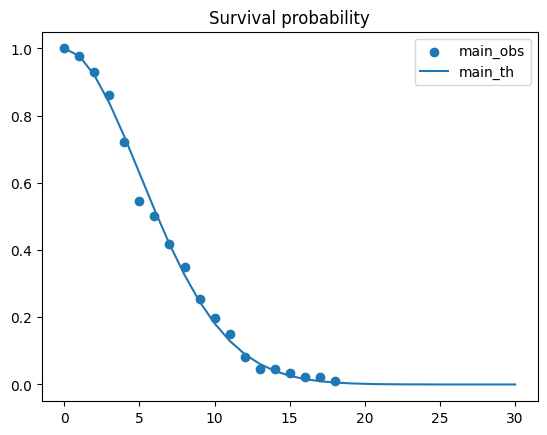

In [33]:
outout = [[],[],[]]

def survivalFunction(a, lambdao, ko,A_max ):
    if (a >= A_max): 
        return 0.0
    else:
        return np.exp(-((a**ko) / (lambdao**ko)))
        
data = {'main':[ 1.88,7.53,30],
        'sub': [1.42,3.54,14],
        'subsub': [2.17,4.55,8]}

for idrt, RootType in enumerate(['main']): #,'sub', 'subsub'
    if len(rtl_winters[idrt] > 0):
        maxT = int(max(rtl_winters[idrt])) + 1
        for yr in range(maxT):
            ratioAlive = sum(rtl_winters[idrt] > yr)/len(rtl_winters[idrt])
            outout[idrt].append(ratioAlive)
        plt.scatter([yr for yr in range(maxT)],outout[idrt], label=RootType+'_obs')

    y_max = data[RootType][2]
    years = np.array([y for y in range(y_max+1)])
    #print(RootType,  data[RootType], years)
    rlt_ = [survivalFunction(yy, data[RootType][1],  data[RootType][0],y_max) for yy in years]
    #print('rlt_',rlt_)
    #plt.scatter(years, rlt_, label=RootType)
    plt.plot(years, rlt_, label=RootType+'_th')

plt.title("Survival probability")
plt.legend()
plt.show()
## subsub goes a bit too far as age threshold was missing

In [ ]:

def survivalFunction(a, lambdao, ko,A_max ):
    if (a >= A_max): 
        return 0.0
    else:
        return np.exp(-((a**ko) / (lambdao**ko)))
        
res = minimize(f, x0, method = 'Nelder-Mead', tol = 1e-6)  # bounds and constraints are possible, but method dependent
    

In [36]:
0.25/2

0.125

In [35]:
survivalFunction(15, data[RootType][1],  data[RootType][0],y_max)

np.float64(0.025907313655269968)

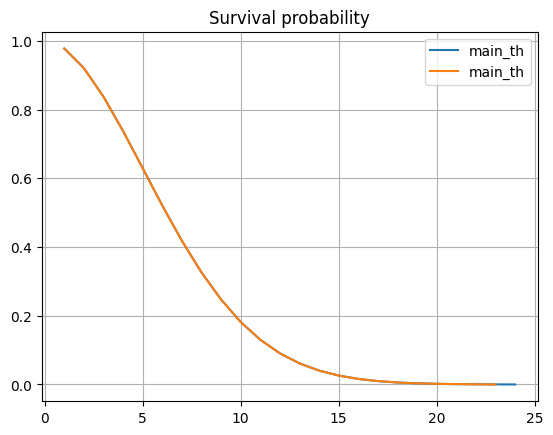

In [60]:
outout = [[],[],[]]

def survivalFunction(a, lambdao=7.53, ko=1.88,A_max=23 ):
    if (a >= A_max): 
        return 0.0
    else:
        return np.exp(-(((a+1)**ko-a**ko) / (lambdao**ko)))
        
def survivalFunction2(a, lambdao=7.53, ko=1.88,A_max=23 ):
    if (a >= A_max): 
        return 0.0
    else:
        return np.exp(-((a**ko) / (lambdao**ko)))
        
years = np.array([y for y in range(24)]) +1
P =  [survivalFunction(yy) for yy in range(24)]
P2 =  [survivalFunction2(yy) for yy in range(24)]

#print('rlt_',rlt_)
#plt.scatter(years, rlt_, label=RootType)
plt.plot(years,np.cumprod( P), label=RootType+'_th')
plt.plot(years[:-1],P2[1:], label=RootType+'_th')

plt.title("Survival probability")
plt.legend()
plt.grid()
plt.show()

In [46]:
np.cumprod(P)[14]

np.float64(0.025907313655269968)

In [54]:

# Continuous
def survivalFunction(a, lambdao=7.53, ko=1.88, A_max=23 ): # value for main roots
    if (a >= A_max): 
        return 0.0
    else:
        return np.exp(-(((a+1)**ko-a**ko) / (lambdao**ko)))

# discrete   
def survivalFunction2(a, lambdao=7.53, ko=1.88,A_max=23 ):# value for main roots
    if (a >= A_max): 
        return 0.0
    else:
        return np.exp(-((a**ko) / (lambdao**ko)))
        

P =  [survivalFunction(yy) for yy in range(24)]
P2 =  [survivalFunction2(yy) for yy in range(24)]

print(np.cumprod(P)[14]) # ~ 0.025
print(P2[15]) # ~ 0.04

0.025907313655269968
0.025907313655269968


In [117]:

def survivalFunction(a, lambdao, ko,A_max ):
    return np.exp(-((a**ko) / (lambdao**ko)))
        
data = {'main':[ 1.88,7.53,23],
        'sub': [1.42,3.54,14],
        'subsub': [2.17,4.55,8]}
RootType = 'main'
y_max = data[RootType][2]
years = np.array([y for y in range(y_max+1)])
survivalFunction(y_max, data[RootType][1],  data[RootType][0],y_max)

np.float64(0.0002859503975686816)

In [ ]:
lambda_survive * (std::pow(-np.log(0.0002859503975686816),1/k_survive)) * 1225

In [115]:
a = [1,2,3]
b = [7,8,9]
a.extend(b)

In [3]:
with open('./benchmark3.pkl','rb') as f:
    benchmark3 = pickle.load(f)

In [4]:
benchmark3

{'year1': {'num': [0.0, 0.0, 0.0, 0.0, 0.0],
  'length': [np.float64(232.98740551181893), 0, 0, 0],
  'ratio': 0},
 'year2': {'num': [0.0, 0.0, 0.0, 0.0, 0.0],
  'length': [np.float64(570.0312345599651),
   np.float64(96.1572467291471),
   0,
   0],
  'ratio': 0},
 'year50': {'num': [np.int64(298),
   np.int64(298),
   np.int64(298),
   np.int64(298),
   np.int64(298)],
  'ratio': 0,
  'kde_main': array([3.37985748e-02, 5.40123833e-02, 7.45699286e-02, 9.36512917e-02,
         9.74184070e-02, 8.24836310e-02, 6.85171482e-02, 6.33748257e-02,
         5.54003463e-02, 3.94448929e-02, 2.20625914e-02, 1.13648405e-02,
         7.29204461e-03, 4.90990181e-03, 2.35723586e-03, 6.66224725e-04,
         1.02872667e-04, 8.42793793e-06, 3.62221119e-07, 8.13201928e-09,
         9.52137297e-11, 5.81056474e-13, 1.84781512e-15, 3.06185343e-18,
         2.64352089e-21]),
  'kde_sub': array([2.90066488e-01, 2.50556832e-01, 2.23576953e-01, 1.83828805e-01,
         1.55562084e-01, 1.11526139e-01, 6.41694837e

#####
#   length, mean, just checking that it does not decrease
# ah wait, not ok: num should be stable but maybe not length, so ignore length after year two, just look at num?
#####
# create dict for each genotype, 2D arrays: [[length for each year] each subtype]

fig, axs = plt.subplots(3,1, figsize=(5, 10))  # 2 rows, 2 columns
for gid, genotype in enumerate(["B", "D", "E"]):
    for st in range(subtypes - 1):
        y = outpout_len_mean[genotype][st]/outpout_num_mean[genotype][st+1]
        # error = outpout_num_sd[genotype][st]
        axs[gid].plot(x_, y, label = st + 2)
        # axs[gid].fill_between(x, y - error, y + error, color='blue', alpha=0.1)
    axs[gid].set_title(genotype)

plt.legend()
# Adjust spacing between subplots
plt.tight_layout()

In [51]:
#####
#   ratio
#####

###
# Create the graphs
# to do: test the survival graphs + update code. as long as attached to existng long lived is ok
# as long as a living root is attched, will keep on living.
##
outpout_mean = {}
outpout_sd = {}
for genotype in ["B", "D", "E"]:

    with open('./measurements'+ genotype +'Init.pkl','rb') as f:
        temp = pickle.load(f)
        outpout_mean[genotype] = temp['mean']
        outpout_sd[genotype] = temp['sd']
x = [year for year in range(years)]        

# create dict for each genotype, 2D arrays: [[length for each year] each subtype]
outpout_ratio_mean = {}
outpout_ratio_sd = {}

for genotype in ["B", "D", "E"]:
    outpout_ratio_mean[genotype] = np.array([outpout_mean[genotype]['year'+str(year + 1)]['ratio'] for year in range(years)])
    outpout_ratio_sd[genotype] = np.array([outpout_sd[genotype]['year'+str(year + 1)]['ratio'] for year in range(years)])
    
fig, axs = plt.subplots(1,1, figsize=(5, 10))  # 2 rows, 2 columns
for gid, genotype in enumerate(["B", "D", "E"]):
    y = outpout_ratio_mean[genotype]
    error = outpout_ratio_sd[genotype] 
    axs.plot(x, y, label = genotype)
    axs.fill_between(x, y - error, y + error, color='blue', alpha=0.1)


plt.legend()
# Adjust spacing between subplots
plt.show()

KeyError: 'year3'

In [52]:
orders =  ['main', 'sub', 'subsub']
outpout_kde_mean = {}
outpout_kde_sd = {}
xx = {}
for genotype in ["B", "D", "E"]:
    outpout_kde_mean[genotype] = {}
    outpout_kde_sd[genotype] = {}
    for oo in orders:        
        outpout_kde_mean[genotype][oo] = outpout_mean[genotype]['year50']['kde_'+oo]
        outpout_kde_sd[genotype][oo] = outpout_sd[genotype]['year50']['kde_'+oo] 
        
    with open('./measurements'+ genotype +'InitXX.pkl','rb') as f:
            temp = pickle.load(f)
            xx[genotype] = temp

In [53]:
plt.figure(figsize=(8, 5))
for genotype in ["B", "D", "E"]:
    for oo in orders:
        mean_kde = outpout_kde_mean[genotype][oo]
        std_kde = outpout_kde_sd[genotype][oo] # benchmark3
        plt.plot(xx[genotype][oo],benchmark3['year50']['kde_'+oo], label=oo+'test', linewidth=2)
        plt.plot(xx[genotype][oo],mean_kde, label=oo, linewidth=2)
        plt.fill_between(xx[genotype][oo], mean_kde - std_kde, mean_kde + std_kde, color='gray', alpha=0.3#, label=oo + '±1 STD'
                        )
        
    # Add labels and legend
    plt.title(genotype)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Show the plot
    plt.show()

NameError: name 'benchmark3' is not defined

<Figure size 800x500 with 0 Axes>

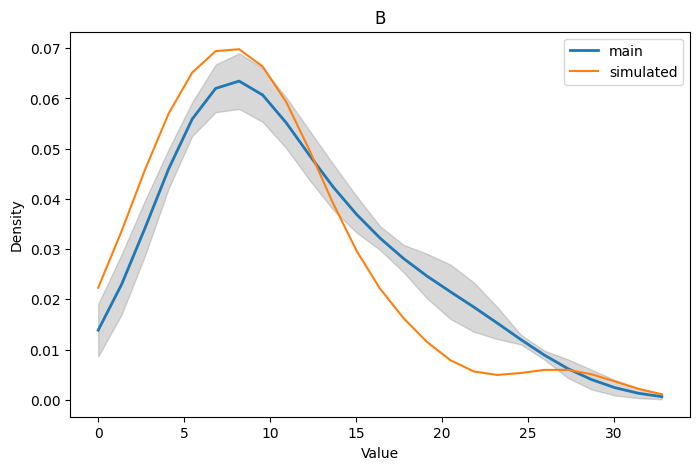

In [118]:
plt.figure(figsize=(8, 5))

b3_st2= [0.02230202, 0.03362541, 0.04588026, 0.05699115, 0.06512948,
       0.0694209 , 0.06979604, 0.06636477, 0.05934027, 0.04964553,
       0.03912178, 0.02966302, 0.0221262 , 0.01624559, 0.01150398,
       0.00785545, 0.00562501, 0.0049336 , 0.00533049, 0.00593702,
       0.00594618, 0.00507792, 0.00363813, 0.00217681, 0.00108631]
for genotype in ["B"]:
    for oo in ['main']:
        mean_kde = outpout_kde_mean[genotype][oo]
        std_kde = outpout_kde_sd[genotype][oo] # benchmark3
        #plt.plot(xx[genotype][oo],benchmark3['year50']['kde_'+oo], label=oo+'test', linewidth=2)
        plt.plot(xx[genotype][oo],mean_kde, label=oo, linewidth=2)
        plt.fill_between(xx[genotype][oo], mean_kde - std_kde, mean_kde + std_kde, color='gray', alpha=0.3#, label=oo + '±1 STD'
                        )
    plt.plot(xx[genotype][oo],b3_st2, label='simulated')
    # Add labels and legend
    plt.title(genotype)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Show the plot
    plt.show()

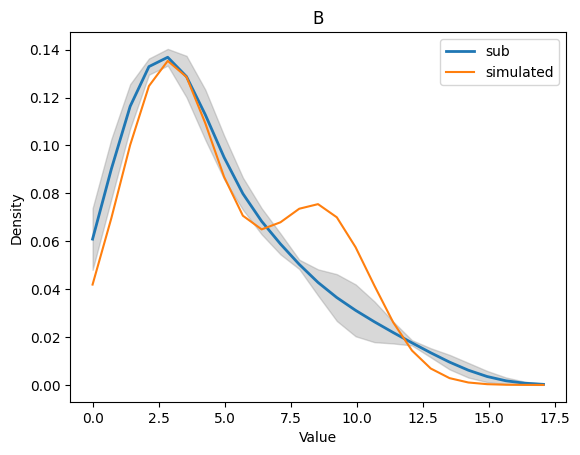

In [117]:
b3_st3 =[4.19079362e-02, 6.96700068e-02, 1.00168832e-01, 1.24821721e-01,
       1.35312409e-01, 1.28623898e-01, 1.09284769e-01, 8.68824804e-02,
       7.06629622e-02, 6.49549490e-02, 6.79162868e-02, 7.35777816e-02,
       7.54986109e-02, 7.00029761e-02, 5.74957199e-02, 4.14704397e-02,
       2.61463571e-02, 1.43633698e-02, 6.85713806e-03, 2.83862135e-03,
       1.01701678e-03, 3.14856005e-04, 8.41167111e-05, 1.93715032e-05,
       3.84206562e-06]
for genotype in ["B"]:
    for oo in ['sub']:
        mean_kde = outpout_kde_mean[genotype][oo]
        std_kde = outpout_kde_sd[genotype][oo] # benchmark3
        #plt.plot(xx[genotype][oo],benchmark3['year50']['kde_'+oo], label=oo+'test', linewidth=2)
        plt.plot(xx[genotype][oo],mean_kde, label=oo, linewidth=2)
        plt.fill_between(xx[genotype][oo], mean_kde - std_kde, mean_kde + std_kde, color='gray', alpha=0.3#, label=oo + '±1 STD'
                        )
    plt.plot(xx[genotype][oo],b3_st3, label='simulated')
    # Add labels and legend
    plt.title(genotype)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Show the plot
    plt.show()

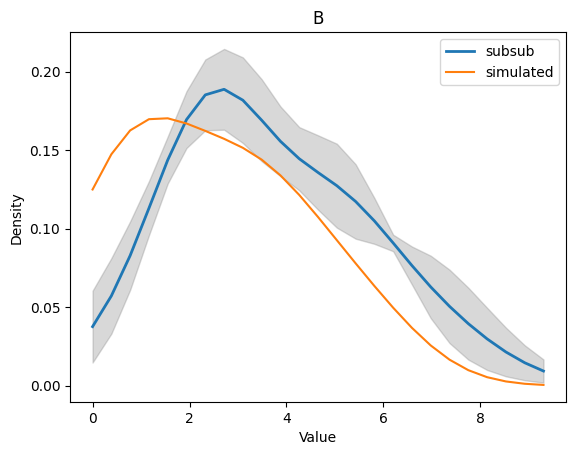

In [121]:
b3_st45 = [0.12498773, 0.14742054, 0.16260924, 0.16975551, 0.17032277,
       0.16702293, 0.16230533, 0.15725971, 0.15151215, 0.14399984,
       0.13397044, 0.12152425, 0.10746092, 0.09272723, 0.07797763,
       0.06354088, 0.04968529, 0.03685476, 0.02565087, 0.01660177,
       0.00992529, 0.00545552, 0.00274832, 0.00126632, 0.00053295]
for genotype in ["B"]:
    for oo in ['subsub']:
        mean_kde = outpout_kde_mean[genotype][oo]
        std_kde = outpout_kde_sd[genotype][oo] # benchmark3
        #plt.plot(xx[genotype][oo],benchmark3['year50']['kde_'+oo], label=oo+'test', linewidth=2)
        plt.plot(xx[genotype][oo],mean_kde, label=oo, linewidth=2)
        plt.fill_between(xx[genotype][oo], mean_kde - std_kde, mean_kde + std_kde, color='gray', alpha=0.3#, label=oo + '±1 STD'
                        )
    plt.plot(xx[genotype][oo],b3_st45, label='simulated')
    # Add labels and legend
    plt.title(genotype)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Show the plot
    plt.show()

In [ ]:
# Example: relative age distribution n(a)
# Let's assume ages 0 to 100
ages = np.linspace(0, 100, 1000)

# Example density: decaying exponential (just for demonstration)
# n(a) = exp(-0.05 * a)
n = np.exp(-0.05 * ages)

# Normalize n(a) to make it a probability density
n = outpout_kde_mean['B']['main']

# Compute survival probability S(a)
# S(a) = integral from a to infinity of n(x) dx
S = np.array([np.trapz(n[i:], ages[i:]) for i in range(len(ages))])

# Plot
plt.figure(figsize=(8,5))
plt.plot(ages, n, label="Age distribution n(a)")
plt.plot(ages, S, label="Survival probability S(a)")
plt.xlabel("Age")
plt.ylabel("Density / Survival")
plt.legend()
plt.show()

In [57]:
np.exp(-(0.134 /650) * 1225)

np.float64(0.7768263343287946)

# BIN

In [98]:
24*4*3/25

11.52

In [148]:
print(np.mean([oo[0] for oo in outpout_num_mean.values()]))

0.07834288337443733


In [7]:
import pandas as pd
import  openpyxl
file_path = './rsml/length_vs_BEDD_and_root_age.xlsx'

df = pd.read_excel(file_path, sheet_name='length_vs_BEDD_and_root_age')

In [8]:
df.columns

Index(['FileName', 'root', 'order', 'length_total_est', 'BEDD_tot',
       'Lmax_root', 'root_age'],
      dtype='object')

In [9]:
df = df[['FileName', 'order', 'root_age']]

In [10]:
orders = list(set(df['order']))

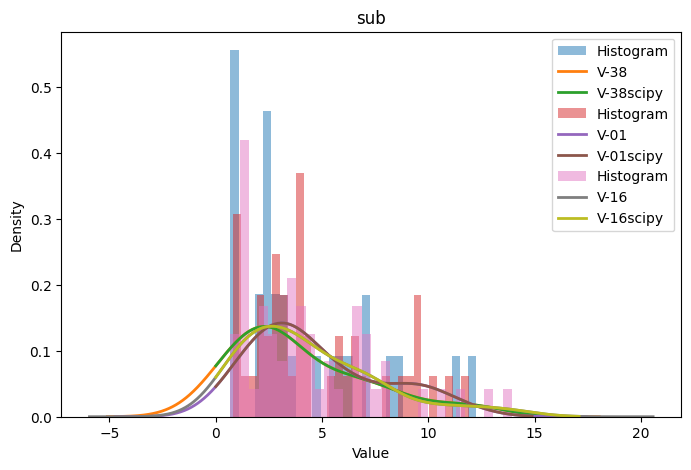

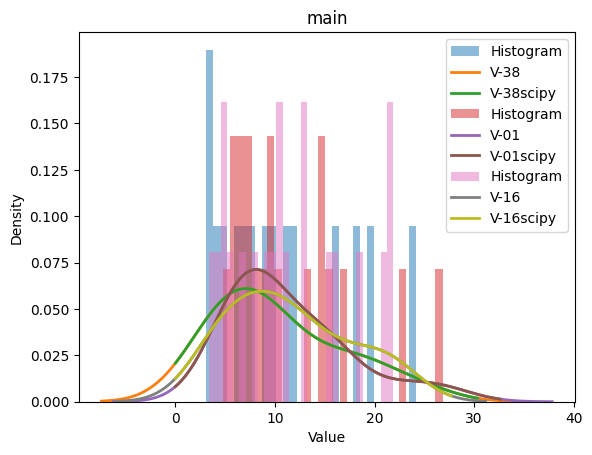

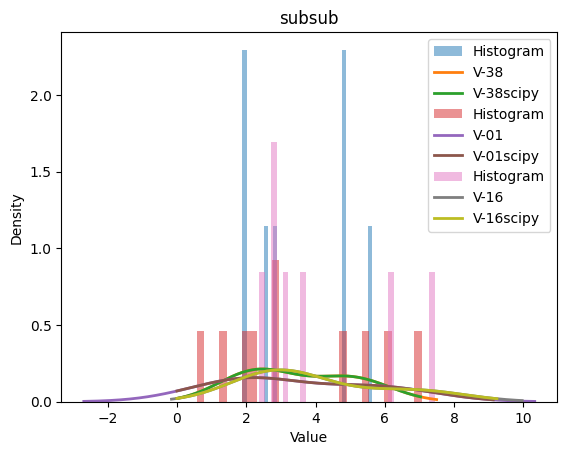

In [68]:
# Create the density plot
from scipy.stats import gaussian_kde
plt.figure(figsize=(8, 5))

for oo in orders:
    filtered_df = df[df['order'] == oo][['root_age','FileName']].copy()
    for im in list(set(filtered_df['FileName'])):
        filtered_df_ = filtered_df[filtered_df['FileName'] == im]['root_age'].copy()
        plt.hist(filtered_df_, bins=30, density=True, alpha=0.5, label='Histogram')
        
        # Add KDE line using pandas or scipy
        pd.Series(filtered_df_).plot(kind='kde', label=im, linewidth=2)

        # Add KDE line using pandas or scipy
        kde = gaussian_kde(filtered_df_)
        x = np.linspace(max(filtered_df_.min() - 3*np.std(filtered_df_),0.) , filtered_df_.max() +  np.std(filtered_df_), 200)
        y = kde(x)
        plt.plot(x,y, label=im+'scipy', linewidth=2)
        
    # Add labels and legend
    plt.title(oo)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Show the plot
    plt.show()

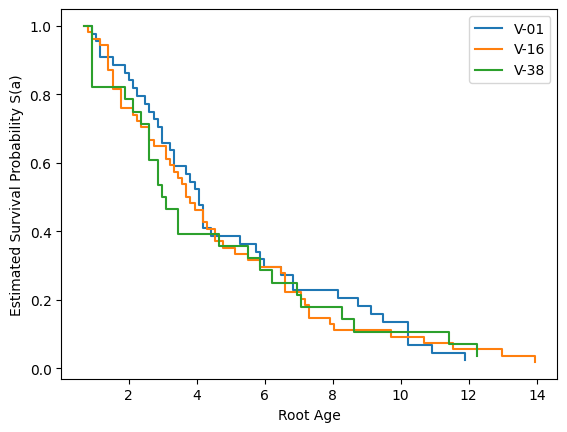

In [98]:
survival_probs = []
max_a = 0
for oo in ['sub']:
    filtered_df = df[df['order'] == oo][['root_age','FileName']].copy()
    
    for im in filtered_df['FileName'].unique():
        filtered_df_ = filtered_df[filtered_df['FileName'] == im]['root_age'].copy()
        
        # Sort ages
        ages = np.sort(filtered_df_.values)
        if max_a < max(ages):
            max_a = max(ages)
        # Compute survival probability from age distribution
        # S(a) = fraction of roots older than a
        N = len(ages)
        survival_prob = np.array([np.sum(ages >= a)/N for a in ages])
        #print(ages,survival_prob)
        plt.step(ages, survival_prob, where='post', label=f'{im}')
        survival_probs.append(survival_prob)
 
plt.xlabel('Root Age')
plt.ylabel('Estimated Survival Probability S(a)')
plt.legend()
plt.show()

In [68]:
max_a

np.float64(13.93975903614458)

In [ ]:
### 'main'

x0 =[7.53, 1.88,3]
import warnings
warnings.filterwarnings("error")
from scipy.optimize import minimize
def survivalFunction2(a, lambdao, ko,A_min=0 ):# value for main roots
    if (a <= A_min): 
        return 1.0
    if (a >= max_a): 
        return 0.0
    else:
        
        try:
            return np.exp(-(((a-A_min)**ko) / (lambdao**ko)))
        except RuntimeWarning:
            print(print(a, lambdao, ko,A_min ))
            raise Exception
        
def target_length(x:np.array):
    out = [survivalFunction2(yy, x[0],x[1],x[2] ) for yy in age_grid]
    sum = 0.
    for i in range(len(age_grid)):
        sum += (out[i] - mean_S[i]) ** 2
    return np.sqrt(sum / (np.max([len(age_grid) - 2, 1])))  # -(k+1)

f = lambda x0: target_length(x0) 
res = minimize(f, x0, method = 'Nelder-Mead', tol = 1e-6)

In [100]:
### 'sub'

x0 =[1.42 ,  3.54]# [7.53, 1.88,3]
import warnings
warnings.filterwarnings("error")
from scipy.optimize import minimize
def survivalFunction2(a, lambdao, ko,A_min=0 ):# value for main roots
    if (a <= A_min): 
        return 1.0
    if (a >= max_a): 
        return 0.0
    else:
        
        try:
            return np.exp(-(((a-A_min)**ko) / (lambdao**ko)))
        except RuntimeWarning:
            print(print(a, lambdao, ko,A_min ))
            raise Exception
        
def target_length(x:np.array):
    out = [survivalFunction2(yy, x[0],x[1] ) for yy in age_grid]
    sum = 0.
    for i in range(len(age_grid)):
        sum += (out[i] - mean_S[i]) ** 2
    return np.sqrt(sum / (np.max([len(age_grid) - 2, 1])))  # -(k+1)

f = lambda x0: target_length(x0) 
res = minimize(f, x0, method = 'Nelder-Mead', tol = 1e-6)

In [103]:
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.021178905915453745
             x: [ 4.995e+00  1.367e+00]
           nit: 65
          nfev: 126
 final_simplex: (array([[ 4.995e+00,  1.367e+00],
                       [ 4.995e+00,  1.367e+00],
                       [ 4.995e+00,  1.367e+00]]), array([ 2.118e-02,  2.118e-02,  2.118e-02]))

44
54
28


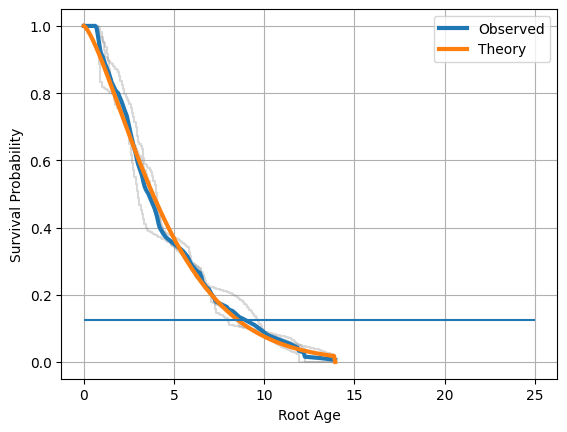

In [102]:
from scipy.interpolate import interp1d
mean_survival_per_order = {}

# Continuous
def survivalFunction(a, lambdao=7.53, ko=1.88, A_max=23 ): # value for main roots
    raise Exception
    if (a >= A_max): 
        return 0.0
    else:
        return np.exp(-(((a+1)**ko-a**ko) / (lambdao**ko)))

# discrete   
def survivalFunction2(a, lambdao=7.53, ko=1,A_min=0 ):# value for main roots
    if (a <= A_min): 
        return 1.0
    if (a >= max_a): 
        return 0.0
    else:
        return np.exp(-(((a-A_min)**ko) / (lambdao**ko)))
        

for oo in ['sub']:
    filtered_df = df[df['order'] == oo][['root_age','FileName']].copy()
    
    all_S = []
    all_files = filtered_df['FileName'].unique()

    # Common age grid (you can adjust spacing)
    max_age = filtered_df['root_age'].max()
    age_grid = np.linspace(0, max_age, 200)
    
    for im in all_files:
        filtered_df_ = filtered_df[filtered_df['FileName'] == im]['root_age'].copy()
        ages = np.sort(filtered_df_.values)
        N = len(ages)
        print(N)
        survival_prob = np.array([np.sum(ages >= a)/N for a in ages])
        
        # Interpolate to common grid
        f = interp1d(ages, survival_prob, bounds_error=False, fill_value=(1,0))
        S_interp = f(age_grid)
        all_S.append(S_interp)
        
        # Optional: plot each curve lightly
        plt.step(age_grid, S_interp, where='post', alpha=0.3, color='gray')
    
    # Compute mean survival curve for this order
    mean_S = np.mean(all_S, axis=0)
    mean_survival_per_order[oo] = (age_grid, mean_S)
    
    # Plot mean curve
    plt.plot(age_grid, mean_S, label=f'Observed', linewidth=3)
    
# P =  [survivalFunction(yy) for yy in age_grid]
try:
    P2 =  [survivalFunction2(yy, res.x[0], res.x[1], res.x[2]) for yy in age_grid]
except:
    P2 =  [survivalFunction2(yy, res.x[0], res.x[1]) for yy in age_grid]
    
plt.plot(age_grid, P2, label=f'Theory', linewidth=3)
plt.xlabel('Root Age')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid()
plt.hlines(y=0.125, xmin=0, xmax=25)
plt.show()

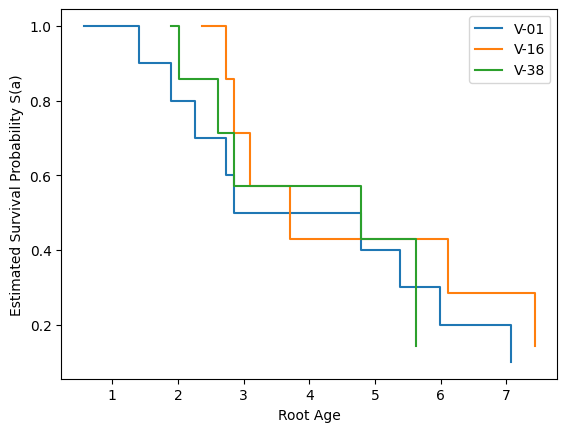

In [104]:

survival_probs = []
max_a = 0
for oo in ['subsub']:
    filtered_df = df[df['order'] == oo][['root_age','FileName']].copy()
    
    for im in filtered_df['FileName'].unique():
        filtered_df_ = filtered_df[filtered_df['FileName'] == im]['root_age'].copy()
        
        # Sort ages
        ages = np.sort(filtered_df_.values)
        if max_a < max(ages):
            max_a = max(ages)
        # Compute survival probability from age distribution
        # S(a) = fraction of roots older than a
        N = len(ages)
        survival_prob = np.array([np.sum(ages >= a)/N for a in ages])
        #print(ages,survival_prob)
        plt.step(ages, survival_prob, where='post', label=f'{im}')
        survival_probs.append(survival_prob)
 
plt.xlabel('Root Age')
plt.ylabel('Estimated Survival Probability S(a)')
plt.legend()
plt.show()

In [105]:
### 'subsub'

x0 =[1.42 ,  3.54]# [7.53, 1.88,3]
import warnings
warnings.filterwarnings("error")
from scipy.optimize import minimize
def survivalFunction2(a, lambdao, ko,A_min=0 ):# value for main roots
    if (a <= A_min): 
        return 1.0
    if (a >= max_a): 
        return 0.0
    else:
        
        try:
            return np.exp(-(((a-A_min)**ko) / (lambdao**ko)))
        except RuntimeWarning:
            print(print(a, lambdao, ko,A_min ))
            raise Exception
        
def target_length(x:np.array):
    out = [survivalFunction2(yy, x[0],x[1] ) for yy in age_grid]
    sum = 0.
    for i in range(len(age_grid)):
        sum += (out[i] - mean_S[i]) ** 2
    return np.sqrt(sum / (np.max([len(age_grid) - 2, 1])))  # -(k+1)

f = lambda x0: target_length(x0) 
res = minimize(f, x0, method = 'Nelder-Mead', tol = 1e-6)
print(res, 'max_a',max_a) #  [ 4.923e+00  1.421e+00]

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.06581659991548408
             x: [ 4.923e+00  1.421e+00]
           nit: 62
          nfev: 122
 final_simplex: (array([[ 4.923e+00,  1.421e+00],
                       [ 4.923e+00,  1.421e+00],
                       [ 4.923e+00,  1.421e+00]]), array([ 6.582e-02,  6.582e-02,  6.582e-02])) max_a 7.433734939759036


10
7
7


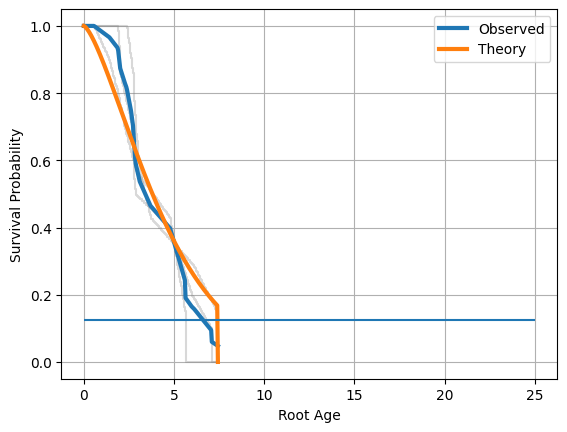

In [106]:
from scipy.interpolate import interp1d
mean_survival_per_order = {}

# Continuous
def survivalFunction(a, lambdao=7.53, ko=1.88, A_max=23 ): # value for main roots
    raise Exception
    if (a >= A_max): 
        return 0.0
    else:
        return np.exp(-(((a+1)**ko-a**ko) / (lambdao**ko)))

# discrete   
def survivalFunction2(a, lambdao=7.53, ko=1,A_min=0 ):# value for main roots
    if (a <= A_min): 
        return 1.0
    if (a >= max_a): 
        return 0.0
    else:
        return np.exp(-(((a-A_min)**ko) / (lambdao**ko)))
        

for oo in ['subsub']:
    filtered_df = df[df['order'] == oo][['root_age','FileName']].copy()
    
    all_S = []
    all_files = filtered_df['FileName'].unique()

    # Common age grid (you can adjust spacing)
    max_age = filtered_df['root_age'].max()
    age_grid = np.linspace(0, max_age, 200)
    
    for im in all_files:
        filtered_df_ = filtered_df[filtered_df['FileName'] == im]['root_age'].copy()
        ages = np.sort(filtered_df_.values)
        N = len(ages)
        print(N)
        survival_prob = np.array([np.sum(ages >= a)/N for a in ages])
        
        # Interpolate to common grid
        f = interp1d(ages, survival_prob, bounds_error=False, fill_value=(1,0))
        S_interp = f(age_grid)
        all_S.append(S_interp)
        
        # Optional: plot each curve lightly
        plt.step(age_grid, S_interp, where='post', alpha=0.3, color='gray')
    
    # Compute mean survival curve for this order
    mean_S = np.mean(all_S, axis=0)
    mean_survival_per_order[oo] = (age_grid, mean_S)
    
    # Plot mean curve
    plt.plot(age_grid, mean_S, label=f'Observed', linewidth=3)
    
# P =  [survivalFunction(yy) for yy in age_grid]
try:
    P2 =  [survivalFunction2(yy, res.x[0], res.x[1], res.x[2]) for yy in age_grid]
except:
    P2 =  [survivalFunction2(yy, res.x[0], res.x[1]) for yy in age_grid]
    
plt.plot(age_grid, P2, label=f'Theory', linewidth=3)
plt.xlabel('Root Age')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid()
plt.hlines(y=0.125, xmin=0, xmax=25)
plt.show()

In [19]:

mean_lifetime = np.trapezoid(mean_S, age_grid)

In [20]:
root_per_year = np.mean([19,20,15])/mean_lifetime

In [21]:
root_per_year * 50

np.float64(77.16589221965121)

In [22]:
print(res.x)

[9.4259063  1.26095869 3.16918798]


In [23]:
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.016576547178195084
             x: [ 9.426e+00  1.261e+00  3.169e+00]
           nit: 97
          nfev: 178
 final_simplex: (array([[ 9.426e+00,  1.261e+00,  3.169e+00],
                       [ 9.426e+00,  1.261e+00,  3.169e+00],
                       [ 9.426e+00,  1.261e+00,  3.169e+00],
                       [ 9.426e+00,  1.261e+00,  3.169e+00]]), array([ 1.658e-02,  1.658e-02,  1.658e-02,  1.658e-02]))

In [93]:
f(x0)

np.float64(0.10514972403474777)

In [ ]:
def survivalFunction2(a, lambdao, ko,A_min ):# value for main roots
    if (a <= A_min): 
        return 1.0
    if (a >= max_a): 
        return 0.0
    else:
        return np.exp(-(((a-A_min)**ko) / (lambdao**ko)))
        

In [47]:
def getrlt(P,x):
    print(x)
    lambdao = x[0]; 
    ko=x[1];
    A_min = x[2] 
    #return 
    return (-np.log(P) * (lambdao**ko))**(1/ko) + A_min , (-np.log(P))**(1/ko) * (lambdao) + A_min 

In [48]:
getrlt(0.125,res.x)

[9.4259063  1.26095869 3.16918798]


(np.float64(20.014145956739846), np.float64(20.01414595673985))

In [49]:
77/8

9.625

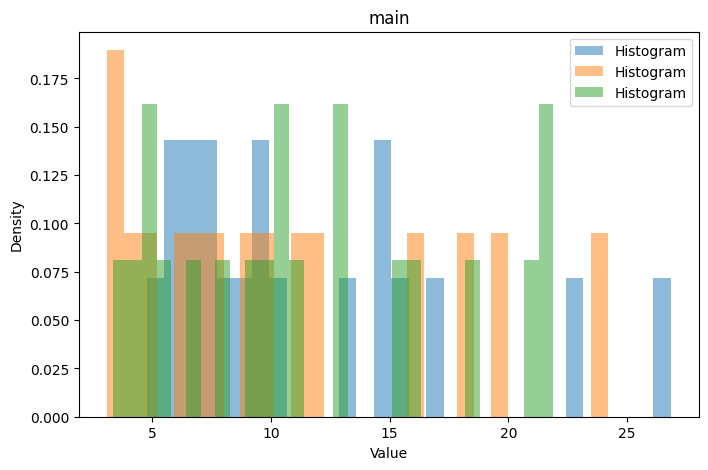

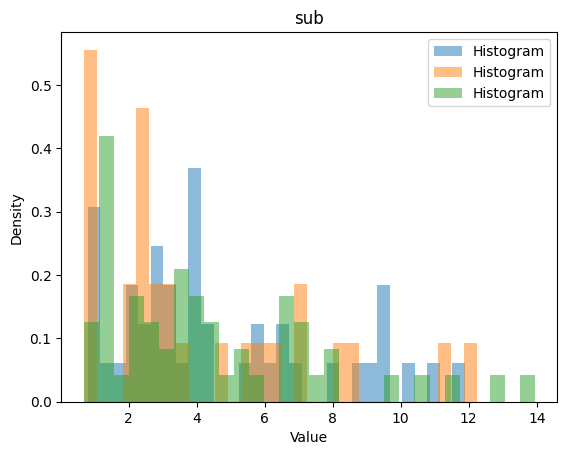

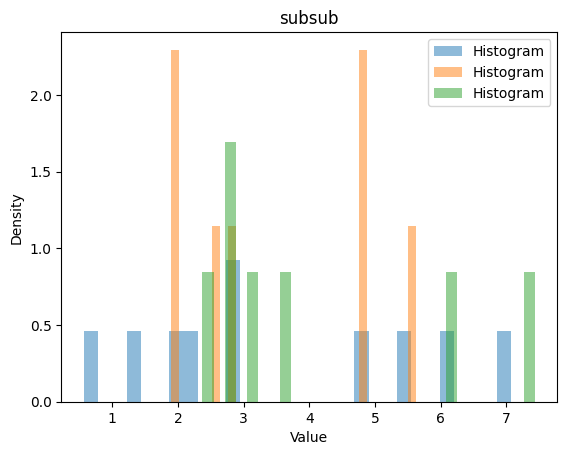

In [22]:
# Create the density plot
plt.figure(figsize=(8, 5))
ageDistrib_mean = []
ageDistrib_sd = []
for oo in orders:
    filtered_df = df[df['order'] == oo][['root_age','FileName']].copy()
    yy = []
    for im in list(set(filtered_df['FileName'])):
        filtered_df_ = filtered_df[filtered_df['FileName'] == im]['root_age'].copy()
        plt.hist(filtered_df_, bins=30, density=True, alpha=0.5, label='Histogram')
        
        # Add KDE line using pandas or scipy
        kde = gaussian_kde(filtered_df_)
        x =  np.linspace(max(filtered_df_.min() - 3*np.std(filtered_df_),0.) , filtered_df_.max() +  np.std(filtered_df_), 200)
        y = kde(x)
        #plt.plot(x,y, label=im, linewidth=2)
        yy.append(y)
    ageDistrib_mean.append(np.mean(yy))
    ageDistrib_sd.append(np.std(yy))
    # x =  np.linspace(max(filtered_df_.min() - 3*np.std(filtered_df_),0.) , filtered_df_.max() +  3*np.std(filtered_df_), 200)
    # for y in yy

    # Add labels and legend
    plt.title(oo)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Show the plot
    plt.show()

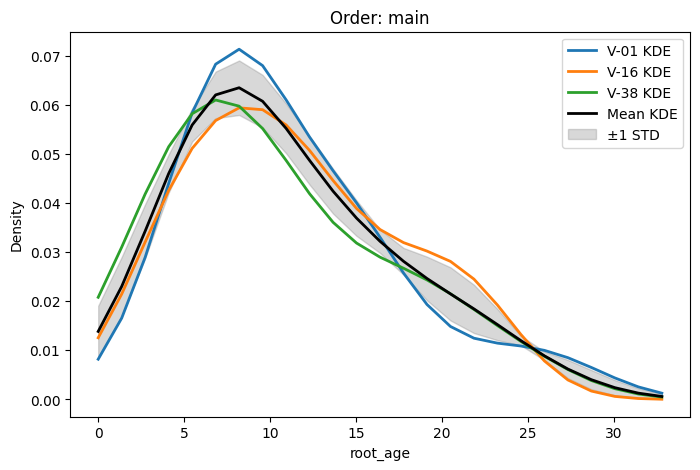

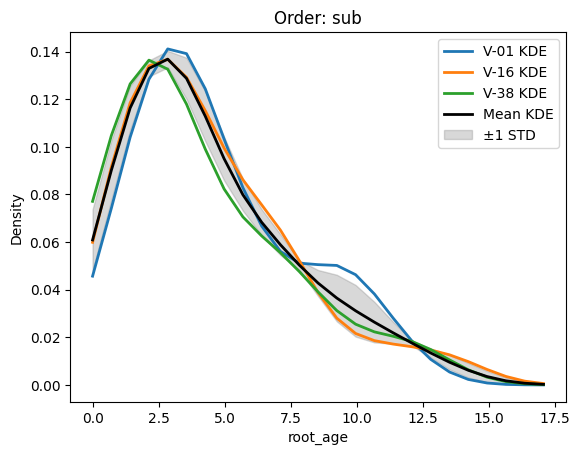

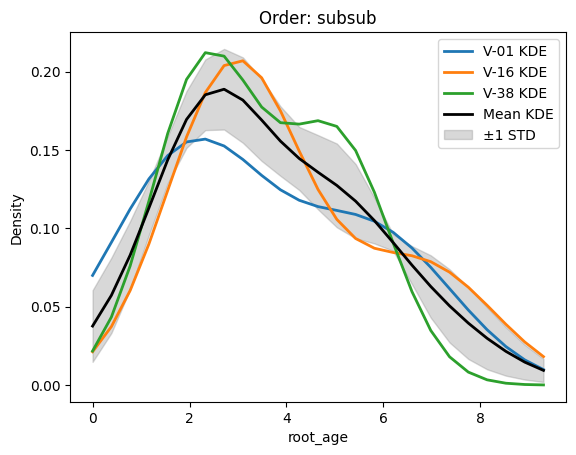

In [24]:

plt.figure(figsize=(8, 5))
mean_kdes = {}
sd_kdes = {}
xx = {}
for oo in orders:
    filtered_df = df[df['order'] == oo][['root_age', 'FileName']].copy()
    
    # List to store KDE y-values for each FileName
    kde_ys = []
    
    # Determine a common x-grid across all FileNames for this order
    min_x = max(filtered_df['root_age'].min() - filtered_df['root_age'].std(), 0)
    max_x = filtered_df['root_age'].max() + filtered_df['root_age'].std()
    x = np.linspace(min_x, max_x, 25)
    
    # Plot KDE for each FileName
    for im in filtered_df['FileName'].unique():
        filtered_df_ = filtered_df[filtered_df['FileName'] == im]['root_age'].copy()
        
        # Histogram (optional)
        #plt.hist(filtered_df_, bins=30, density=True, alpha=0.2, label=f'{im} Histogram')
        
        # KDE
        kde = gaussian_kde(filtered_df_)
        y = kde(x)
        plt.plot(x, y, label=f'{im} KDE', linewidth=2)
        kde_ys.append(y)
    
    # Convert list to array for easier computation
    kde_ys = np.array(kde_ys)
    
    # Compute mean and std across KDEs
    mean_kde = np.mean(kde_ys, axis=0)
    std_kde = np.std(kde_ys, axis=0)
    mean_kdes[oo] = mean_kde
    sd_kdes[oo] = std_kde
    xx[oo] = x
    # Plot mean KDE
    plt.plot(x, mean_kde, color='black', linewidth=2, label='Mean KDE')
    
    # Plot ±1 std band
    plt.fill_between(x, mean_kde - std_kde, mean_kde + std_kde, color='gray', alpha=0.3, label='±1 STD')
    
    # Labels and title
    plt.title(f'Order: {oo}')
    plt.xlabel('root_age')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [76]:
xx

{'sub': array([ 0.        ,  0.47544156,  0.95088311,  1.42632467,  1.90176623,
         2.37720778,  2.85264934,  3.3280909 ,  3.80353246,  4.27897401,
         4.75441557,  5.22985713,  5.70529868,  6.18074024,  6.6561818 ,
         7.13162335,  7.60706491,  8.08250647,  8.55794802,  9.03338958,
         9.50883114,  9.9842727 , 10.45971425, 10.93515581, 11.41059737,
        11.88603892, 12.36148048, 12.83692204, 13.31236359, 13.78780515,
        14.26324671, 14.73868826, 15.21412982, 15.68957138, 16.16501294,
        16.64045449, 17.11589605, 17.59133761, 18.06677916, 18.54222072,
        19.01766228, 19.49310383, 19.96854539, 20.44398695, 20.91942851,
        21.39487006, 21.87031162, 22.34575318, 22.82119473, 23.29663629]),
 'subsub': array([ 0.        ,  0.26606015,  0.53212029,  0.79818044,  1.06424059,
         1.33030073,  1.59636088,  1.86242102,  2.12848117,  2.39454132,
         2.66060146,  2.92666161,  3.19272176,  3.4587819 ,  3.72484205,
         3.9909022 ,  4.25696234

In [74]:
mean_kdes

{'sub': array([6.08955291e-02, 8.04737488e-02, 9.97318551e-02, 1.16472873e-01,
        1.28862382e-01, 1.35755255e-01, 1.36801939e-01, 1.32429140e-01,
        1.23768793e-01, 1.12489159e-01, 1.00442974e-01, 8.91772926e-02,
        7.95268473e-02, 7.15321025e-02, 6.47252053e-02, 5.85755181e-02,
        5.28031479e-02, 4.74129511e-02, 4.25263531e-02, 3.82017073e-02,
        3.43744385e-02, 3.09106035e-02, 2.76849540e-02, 2.46150343e-02,
        2.16512565e-02, 1.87609680e-02, 1.59300047e-02, 1.31740518e-02,
        1.05421605e-02, 8.10675119e-03, 5.94631180e-03, 4.12744429e-03,
        2.68902180e-03, 1.63133334e-03, 9.14942370e-04, 4.71471155e-04,
        2.22084159e-04, 9.52432028e-05, 3.70737323e-05, 1.30684670e-05,
        4.16498159e-06, 1.19891705e-06, 3.11558284e-07, 7.30922650e-08,
        1.54890106e-08, 2.96817850e-09, 5.15300084e-10, 8.12586688e-11,
        1.16801217e-11, 1.53722893e-12]),
 'subsub': array([3.76553571e-02, 5.04253130e-02, 6.61322696e-02, 8.45990023e-02,
     

In [55]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(filtered_df_)
x = np.linspace(filtered_df_.min(), filtered_df_.max(), 200)
y = kde(x)


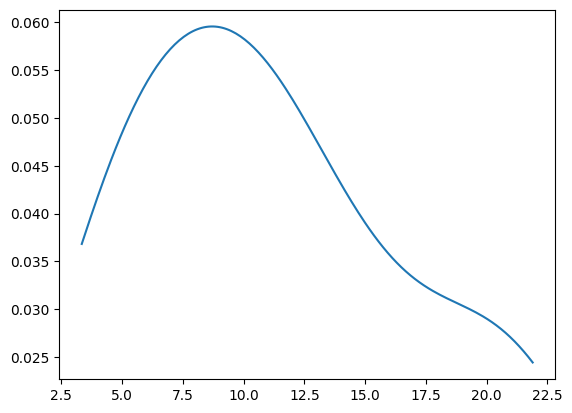

In [57]:
plt.plot(x,y)

In [ ]:

    outputs_50 = {
            'num':[0.,0.,0.,0.,0.],
            'ratio':0,
            'kde_mean':[0. for i in range(50)],
            'kde_sub':[0. for i in range(50)],
            'kde_subsub':[0. for i in range(50)]
            }
            